In [4]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
%matplotlib inline

img = cv2.imread('IMG_20181005_151445.jpg')


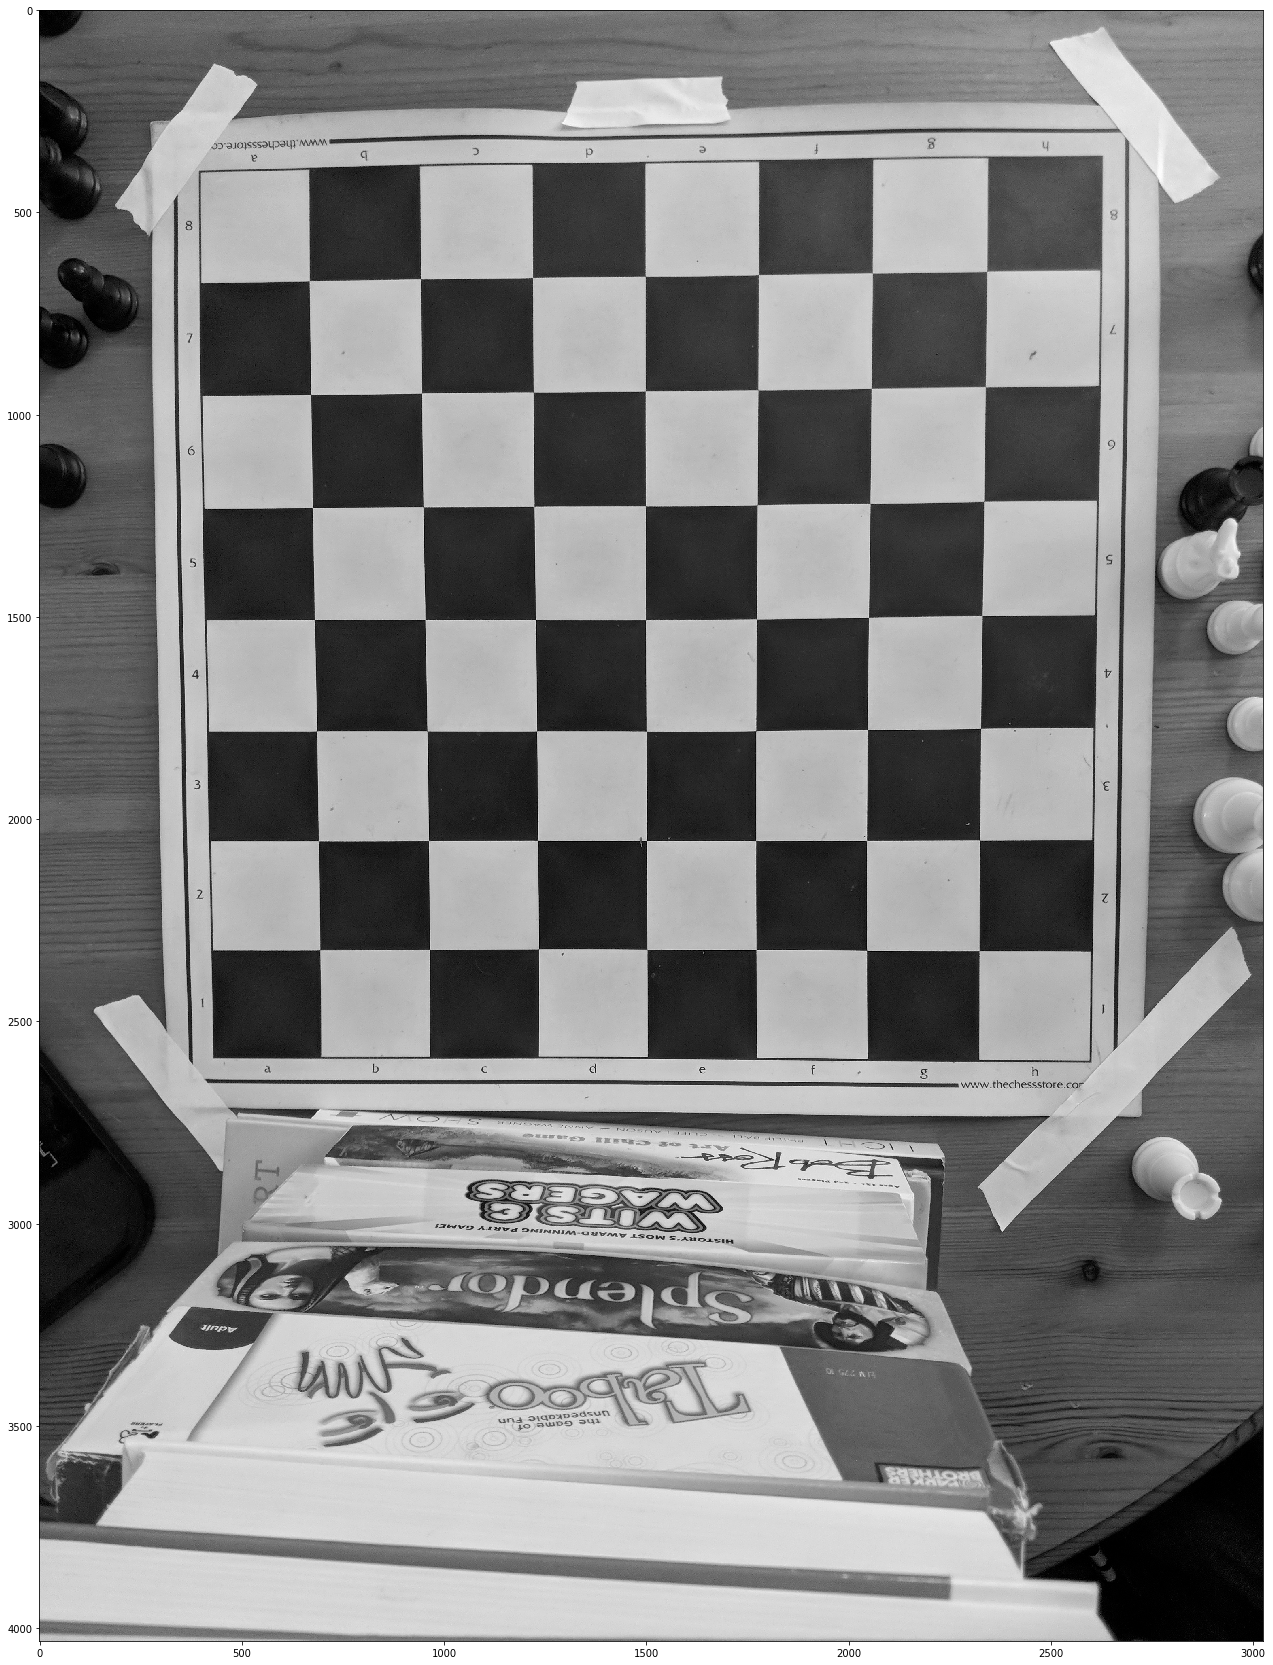

In [5]:

plt.figure(figsize=(30,30))
plt.imshow(img, cmap='gray')

In [6]:
ret, corners = cv2.findChessboardCorners(img,(7,7), flags=cv2.CALIB_CB_NORMALIZE_IMAGE|cv2.CALIB_CB_ADAPTIVE_THRESH)
corners = corners.reshape((49,2))
corners2 = corners.reshape((7,7,2))

ValueError: cannot reshape array of size 94 into shape (49,2)

In [7]:
print(ret)
print(corners2)

False


NameError: name 'corners2' is not defined

In [ ]:
plt.figure(figsize=(30,30))
plt.imshow(img, cmap='gray')
for x in range(7):
    for y in range(7):
        plt.plot([corners2[x,y,0]],[corners2[x,y,1]],'o',color = 'r',markersize=20)
plt.plot([corners2[0,1,0]],[corners2[0,1,1]],'o',color = 'b',markersize=20)

In [6]:
print(corners[:,0])

[2839.3577  2833.87    2827.9795  2823.9744  2821.4993  2819.851
 2818.2874  2514.6838  2510.3062  2506.0664  2502.8604  2502.5488
 2503.7666  2504.385   2190.4927  2188.7173  2187.3757  2186.1934
 2186.564   2189.3457  2190.968   1867.9552  1868.9796  1871.3535
 1873.1365  1875.3285  1877.0001  1878.9698  1543.4292  1547.8021
 1553.9061  1559.2034  1562.4111  1563.8746  1566.3359  1219.6128
 1225.5227  1232.6588  1239.8677  1244.4493  1248.713   1252.3024
  894.7613   902.0669   909.75604  918.0163   925.3267   931.9741
  938.868  ]


In [7]:
from itertools import product 
a = np.linspace(7,1,7)
b = np.linspace(7,1,7)
X_train = np.array(list(product(a,b)))
print(X_train)
print(X_train[1])

[[7. 7.]
 [7. 6.]
 [7. 5.]
 [7. 4.]
 [7. 3.]
 [7. 2.]
 [7. 1.]
 [6. 7.]
 [6. 6.]
 [6. 5.]
 [6. 4.]
 [6. 3.]
 [6. 2.]
 [6. 1.]
 [5. 7.]
 [5. 6.]
 [5. 5.]
 [5. 4.]
 [5. 3.]
 [5. 2.]
 [5. 1.]
 [4. 7.]
 [4. 6.]
 [4. 5.]
 [4. 4.]
 [4. 3.]
 [4. 2.]
 [4. 1.]
 [3. 7.]
 [3. 6.]
 [3. 5.]
 [3. 4.]
 [3. 3.]
 [3. 2.]
 [3. 1.]
 [2. 7.]
 [2. 6.]
 [2. 5.]
 [2. 4.]
 [2. 3.]
 [2. 2.]
 [2. 1.]
 [1. 7.]
 [1. 6.]
 [1. 5.]
 [1. 4.]
 [1. 3.]
 [1. 2.]
 [1. 1.]]
[7. 6.]


In [8]:
# Create two regression to find outer corners
from sklearn.linear_model import LinearRegression

X_Regressor = LinearRegression()
Y_Regressor = LinearRegression()


In [9]:
X_Regressor.fit(X_train,corners[:,0])
Y_Regressor.fit(X_train,corners[:,1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
edge_features = np.array([
    (8,8),
    (8,7),
    (8,6),
    (8,5),
    (8,4),
    (8,3),
    (8,2),
    (8,1),
    (8,0),
    (7,0),
    (6,0),
    (5,0),
    (4,0),
    (3,0),
    (2,0),
    (1,0),
    (0,0),
    (0,1),
    (0,2),
    (0,3),
    (0,4),
    (0,5),
    (0,6),
    (0,7),
    (0,8),
    (1,8),
    (2,8),
    (3,8),
    (4,8),
    (5,8),
    (6,8),
    (7,8)
])

corner_features = np.array([
    (8,8),
    (8,0),
    (0,0),
    (0,8),
])

In [11]:
x_predict = X_Regressor.predict(corner_features)
y_predict = Y_Regressor.predict(corner_features)

In [12]:
print(x_predict, y_predict)

[3135.45870037 3151.09233     609.1402837   593.50665408] [ 204.83002456 2730.01076835 2742.17557821  216.99483443]


In [13]:
pts1 = np.float32([[x_predict[0],y_predict[0]],[x_predict[1],y_predict[1]],[x_predict[2],y_predict[2]],[x_predict[3],y_predict[3]]]) 
pts2 = np.float32([[1440,1440],[1440,0],[0,0],[0,1440]])

In [14]:
M =cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(1440,1440))

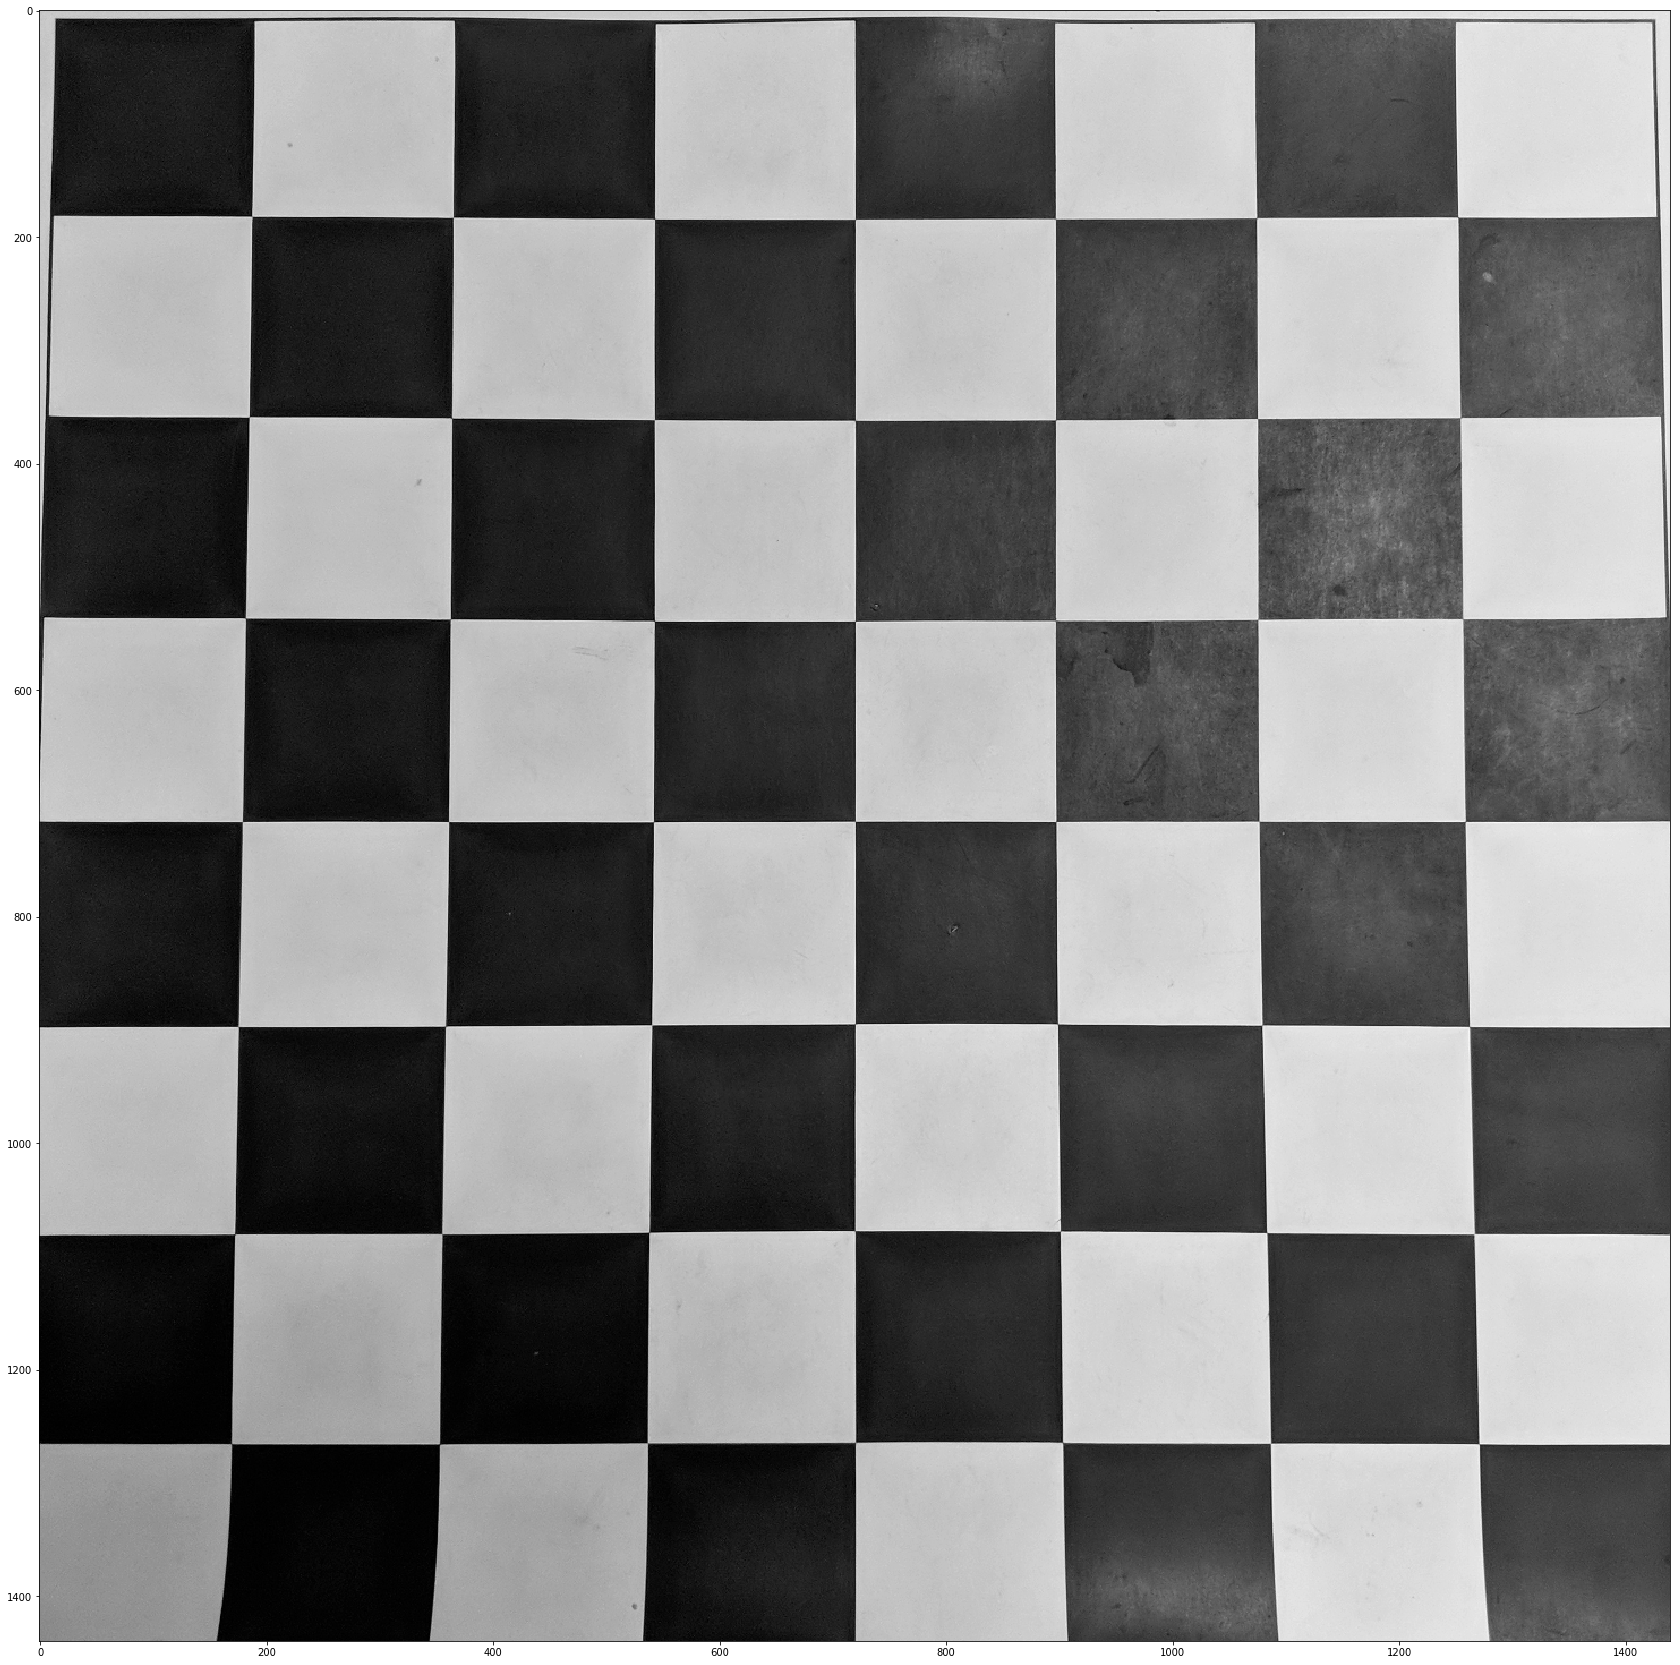

In [15]:
plt.figure(figsize=(30,30))
plt.imshow(dst, cmap='gray')


In [16]:
ret_dst, corners_dst = cv2.findChessboardCorners(dst,(7,7), None)
corners_dst = corners_dst.reshape((49,2))
corners2_dst = corners_dst.reshape((7,7,2))

In [17]:
X_Regressor_dst = LinearRegression()
Y_Regressor_dst = LinearRegression()

X_Regressor_dst.fit(X_train,corners_dst[:,0])
Y_Regressor_dst.fit(X_train,corners_dst[:,1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
x_predict_dst = X_Regressor_dst.predict(edge_features)
y_predict_dst = Y_Regressor_dst.predict(edge_features)

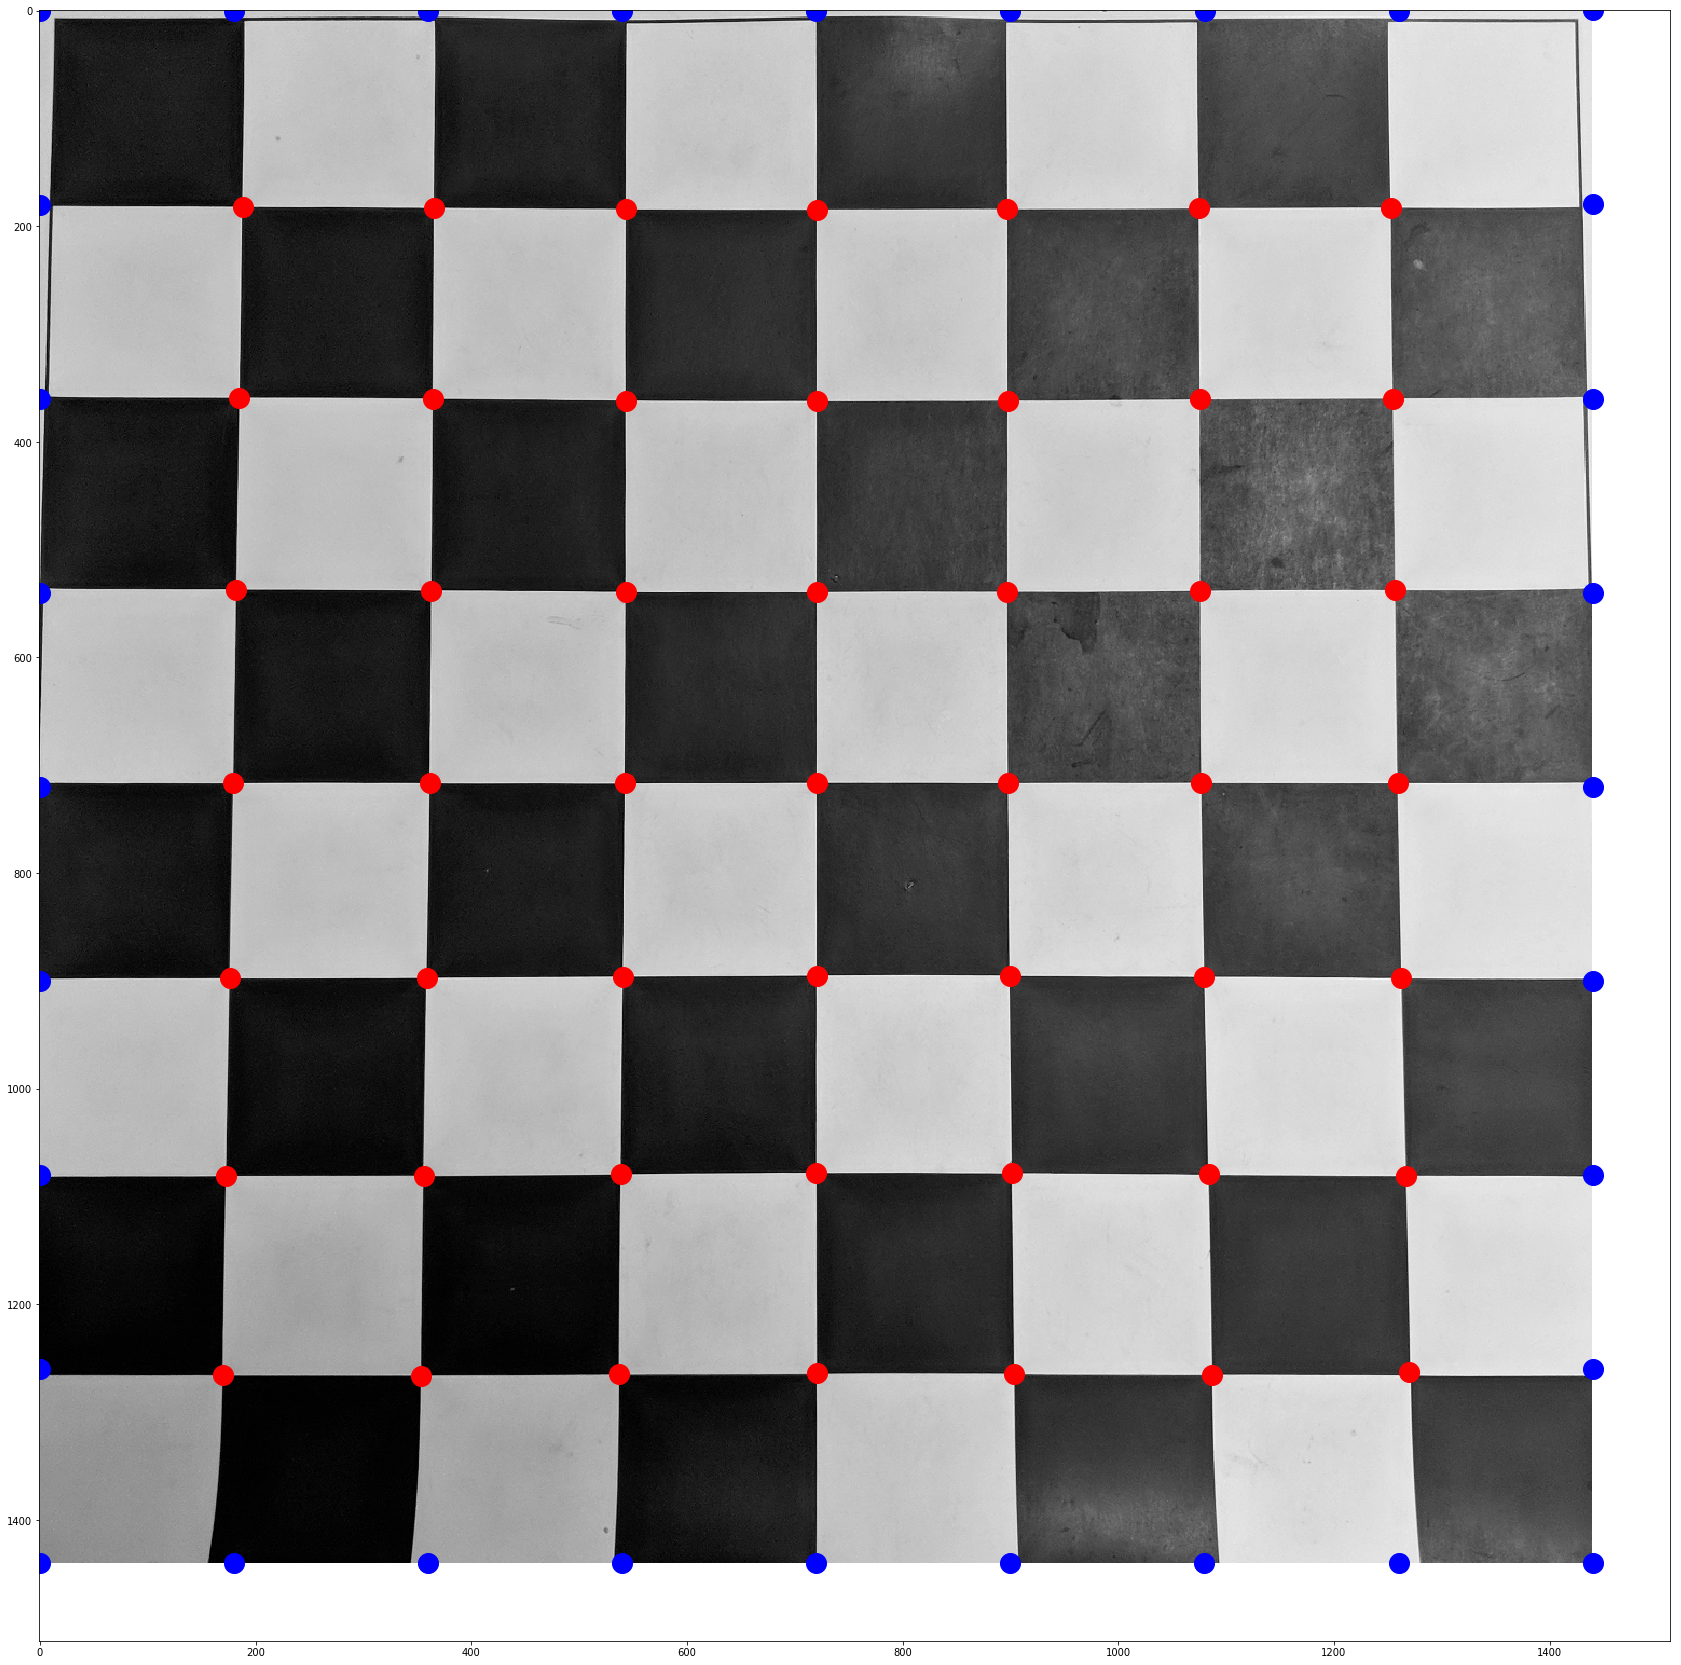

In [19]:
plt.figure(figsize=(30,30))
plt.imshow(dst, cmap='gray')
for x in range(7):
    for y in range(7):
        plt.plot([corners2_dst[x,y,0]],[corners2_dst[x,y,1]],'o',color = 'r',markersize=20)
plt.plot([x_predict_dst],[y_predict_dst],'o',color = 'b',markersize=20)

True

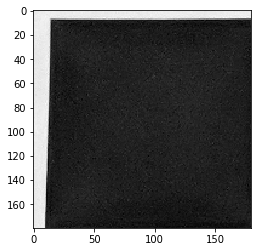

In [26]:
import math
a8 = dst[0:math.floor(1440/8),0:math.floor(1440/8)]
plt.imshow(dst[0:math.floor(1440/8),0:math.floor(1440/8)], cmap='gray')
cv2.imwrite("a8.jpg",a8)

In [27]:
M

array([[ 5.66476981e-01, -3.50710659e-03, -3.35446833e+02],
       [-2.72894387e-03, -5.70239322e-01,  1.56535863e+03],
       [ 2.28595420e-12, -9.53726787e-12,  1.00000000e+00]])